# 1. Exploratory Data Analysis

## 1.1 Detect and Handling Missing Values

In [870]:
import pandas as pd

df = pd.read_csv('american_bankruptcy_dataset.csv')
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 company_name    0
fyear           0
status_label    0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
Division        0
MajorGroup      0
dtype: int64


## 1.2 Distinguish Attributes

| Column | Header                        | Description                                                  |
| ------ | ----------------------------- | ------------------------------------------------------------ |
| X1     | Current assets                | All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year. |
| X2     | Cost of goods sold            | The total amount a company paid as a cost directly related to the sale of products. |
| X3     | Depreciation and amortization | Depreciation refers to the loss of value of a tangible fixed asset over time (such as property. machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time. |
| X4     | EBITDA                        | Earnings before interest, taxes, depreciation and amortization: Measure of a company’s overall financial performance alternative to the net income. |
| X5     | Inventory                     | The accounting of items and raw materials that a company either uses in production or sells. |
| X6     | Net Income                    | The overall profitability of a company after all expenses and costs have been deducted from total revenue. |
| X7     | Total Receivables             | The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers. |
| X8     | Market value                  | The price of an asset in a marketplace. In our dataset it refers to the market capitalization since companies are publicly traded in the stock market. |
| X9     | Net sales                     | The sum of a company’s gross sales minus its returns, allowances, and discounts. |
| X10    | Total assets                  | All the assets, or items of value, a business owns.          |
| X11    | Total Long term debt          | A company’s loans and other liabilities that will not become due within one year of the balance sheet date. |
| X12    | EBIT                          | Earnings before interest and taxes.                          |
| X13    | Gross Profit                  | The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services. |
| X14    | Total Current Liabilities     | It is the sum of accounts payable, accrued liabilities and taxes such as Bonds payable at the end of the year, salaries and commissions remaining. |
| X15    | Retained Earnings             | The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes and its dividends to shareholders. |
| X16    | Total Revenue                 | The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments. |
| X17    | Total Liabilities             | The combined debts and obligations that the company owes to outside parties. |
| X18    | Total Operating Expenses      | The expense a business incurs through its normal business operations |


In [874]:
# Map alive to 0, failed to 1 in clolumn status_label

df['status_label'] = df['status_label'].map({'alive': 0, 'failed': 1})
print(df['status_label'])

0        0
1        0
2        0
3        0
4        0
        ..
78677    0
78678    0
78679    0
78680    0
78681    0
Name: status_label, Length: 78682, dtype: int64


## 1.3 Apply Benford's Law

In [877]:
def get_company_numeric_data(c_name):
    '''
    Get all numeric data of a selected company
    '''
    
    # Filter the data of the specified company based on company_name
    company_data = df[df['company_name'] == c_name]

    # Extract data from columns X1 to X18
    company_numeric_data = company_data.loc[:, 'X1':'X18'].values.flatten().tolist()

    return(company_numeric_data)

In [879]:
from collections import Counter

def frequency_of_first_digit(list):
    '''
    Calculate the frequency of the first digit
    '''
    # Get the first digit of the absolute value of all numbers
    first_digits = [int(str(abs(x))[0]) for x in list]

    # Count the number of occurrences of each first digit
    counter = Counter(first_digits)

    # Calculate the frequency of each number
    total_count = sum(counter.values())
    frequency = [counter.get(digit, 0) for digit in range(1, 10)]

    # print(frequency)

    return frequency

In [881]:
from scipy.stats import ks_2samp

def kolmogorov_smirnov_test(fre, theo_fre):
    '''
    Kolmogorov–Smirnov test
    '''
    statistic, p_value = ks_2samp(fre, theo_fre)

    return p_value

In [883]:
from scipy.stats import chisquare

def chi_square_test(observed, expected):
    # normalization
    observed = [x / sum(observed) for x in observed]
    
    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

    # print(f"Chi-Square Statistic: {chi2_stat}")
    # print(f"P-Value: {p_value}")

    return p_value

In [885]:
import math

# calculate theoretical frequency

theoretical_frequency = [math.log10(1+1/digit) for digit in range(1, 10)]

print(theoretical_frequency)

[0.3010299956639812, 0.17609125905568124, 0.12493873660829993, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]


[116, 46, 41, 28, 26, 28, 25, 22, 10]


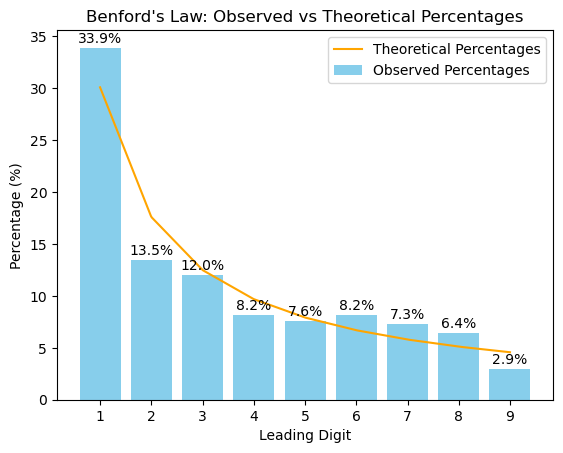

In [901]:
import matplotlib.pyplot as plt

# plot a Benford's Law example

list = get_company_numeric_data('C_1')
list_counts = frequency_of_first_digit(list)
print(list_counts)

# Normalize observed counts to percentages
total_counts = sum(list_counts)
list_percentages = [count / total_counts * 100 for count in list_counts]

# Convert theoretical frequencies to percentages
theoretical_percentages = [freq * 100 for freq in theoretical_frequency]

# Generate a smooth curve for theoretical percentages
x_smooth = np.linspace(1, 9, 500)  # Smooth x-axis range
theoretical_curve = np.interp(x_smooth, np.arange(1, 10), theoretical_percentages)

# Create a bar plot for observed percentages
x = np.arange(1, 10)
plt.bar(x, list_percentages, color="skyblue", label="Observed Percentages")

# Plot a smooth curve for theoretical percentages
plt.plot(x_smooth, theoretical_curve, color="orange", label="Theoretical Percentages")

# Annotate each bar with its value
for i, percentage in enumerate(list_percentages):
    plt.text(x[i], percentage + 0.5, f"{percentage:.1f}%", ha='center', fontsize=10)

# Add labels, title, and legend
plt.xlabel("Leading Digit")
plt.ylabel("Percentage (%)")
plt.title("Benford's Law: Observed vs Theoretical Percentages")
plt.xticks(x)
plt.legend()

# Display the plot
plt.show()

In [751]:
# count = 0
# for i in range(1, 8972):
#     c_name = 'C_'+str(i)
#     # print(c_name)
#     list = get_company_numeric_data(c_name)
#     fre = frequency_of_first_digit(list)
#     p_value = chi_square_test(fre, theoretical_frequency)
#     if p_value < 0.05:
#         count+=1
# print('Detected bankruptcy:', count)

We found that Benford's Law has no obvious effect on bankruptcy detection.

## 1.4 Univariate Analysis

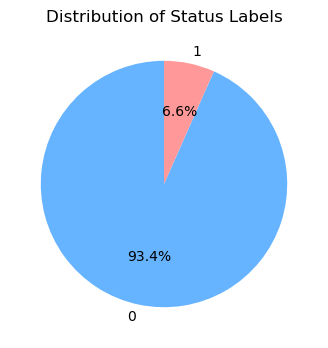

In [755]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value
status_counts = df['status_label'].value_counts()

# Create a pie chart to show the ratio of alive and failed
plt.figure(figsize=(4, 4))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start pie chart at 90 degrees
    colors=['#66b3ff', '#ff9999']  # Custom colors
)

plt.title('Distribution of Status Labels')
plt.show()

According to pie chart, we can clearly find out this is an imbalance dataset. So we need to handle this problem with **sampling**. 

## 1.5 Multi-variate Analysis

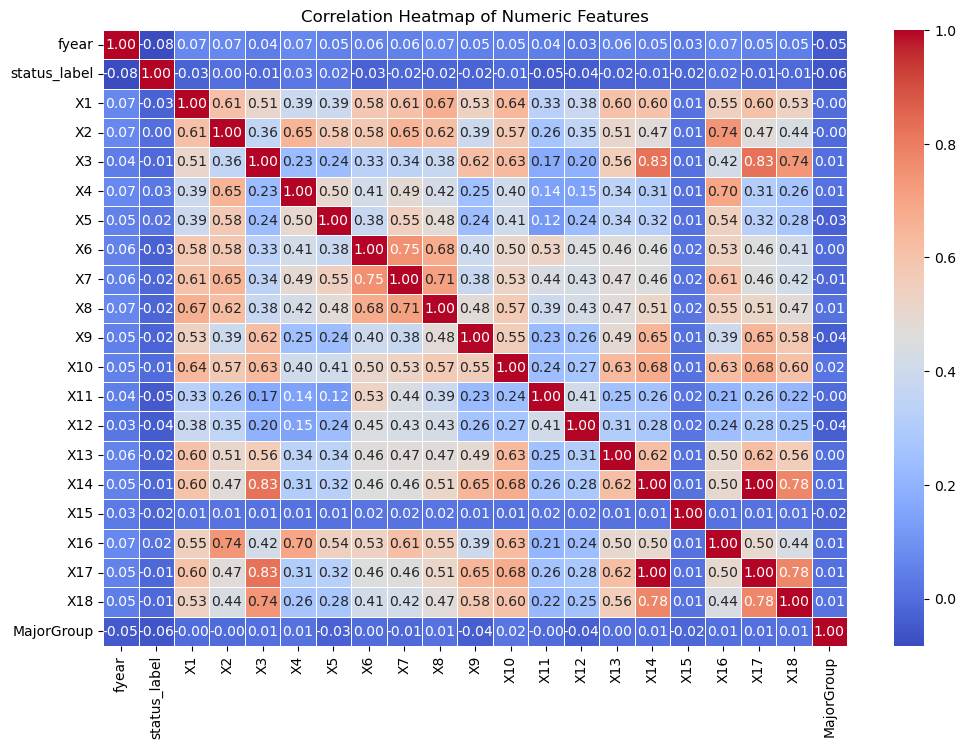

In [759]:
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## 1.6 Feature Engineering

In [762]:
# Delete column company_name, fyear, MajorGroup
df = df.drop(columns=['fyear', 'MajorGroup'])

print(df.head())

  company_name  status_label        X1          X2        X3        X4  \
0          C_1             0  511267.0  740998.000  833107.0  180447.0   
1          C_1             0  485856.0     701.854  713811.0  179987.0   
2          C_1             0  436656.0  710199.000  526477.0  217699.0   
3          C_1             0  396412.0     686.621  496747.0  164658.0   
4          C_1             0  432204.0     709.292  523302.0  248666.0   

         X5        X6         X7         X8  ...       X10        X11  \
0  18373.00  70658.00  89031.000  191226.00  ...  163816.0     35.163   
1  18577.00     45.79  64367.000  160444.00  ...  125392.0  18531.000   
2  22496.00   4711.00  27207.000  112244.00  ...  150464.0    -58.939   
3  27172.00   3573.00  30745.000     109.59  ...  203575.0    -12.410   
4     26.68  20811.00     47.491  128656.00  ...  131261.0   3504.000   

          X12         X13          X14       X15       X16          X17  \
0  201026.000     128.348  1024333.000  3

In [769]:
from sklearn.preprocessing import LabelEncoder

# Convert the specified column(company_name, status_label, Division) to categorical encoding
label_encoders = {}
for col in ['company_name', 'status_label', 'Division']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for decoding

# Output the encoded data
print("\nEncoded data:")
print(df.tail())


Encoded data:
       company_name  status_label        X1          X2       X3          X4  \
78677          8857             0  233211.0  1099101.00  43338.0  184666.000   
78678          8857             0  105559.0  1865926.00  59184.0     770.103   
78679          8857             0   63971.0  1746235.00  69074.0  683985.000   
78680          8857             0  135207.0     1736.11  66527.0  694035.000   
78681          8857             0   82589.0     1625.37  68817.0  632122.000   

              X5          X6        X7        X8  ...  gross_profit_margin  \
78677  14094.000   31521.000   45615.0   60885.0  ...          6767.180095   
78678  42592.000  159541.000  202133.0  231969.0  ...         23868.444056   
78679  65057.000      13.994   79051.0  100784.0  ...         16453.700116   
78680     65.330    3841.000   69171.0   95357.0  ...            13.520616   
78681     65.201    2061.000   67262.0   91696.0  ...            21.704072   

       current_ratio  inventory_tur

Based on the correlation between different columns in the heatmap and some bankruptcy financial knowledge, we created the following features. Next, we will add these features to the dataset and test whether they are helpful in improving the accuracy of the model.

1. **Financial leverage related**
   1. Total debt to total assets ratio (X17 / X10)
      - Measures the leverage level of the company, showing how much of its assets rely on debt financing. Excessive leverage may indicate an increased risk of bankruptcy.
   2. Current liabilities to total debt ratio (X14 / X17)
      - Measures the proportion of short-term debt in total debt. Higher short-term debt may reflect short-term debt repayment pressure.
2. **Profitability related**
   1. Net profit margin (X6 / X9)
      - Indicates the company's ability to obtain net income from sales. Low net profit margin may be a precursor to financial health problems.
   2. EBITDA profit margin (X4 / X9)
      - EBITDA reflects the core profitability of the company better than net profit. Analyze its relationship with bankruptcy.
   3. Gross profit margin (X13 / X9)
      - Reflects the basic profitability of the company's production and sales links. A decline in gross profit margin may indicate a weakening of competitiveness.
3. **Liquidity and turnover efficiency**
   1. Current ratio (X1 / X14)
      - Measures the company's short-term debt repayment ability. Too low may lead to liquidity crisis.
   2. Inventory turnover (X9 / X5)
      - Reflects the ability to convert inventory into cash. Inventory backlog may indicate capital turnover problems.
   3. Accounts receivable turnover (X9 / X7)
      - Measures the efficiency of the company's collection of sales revenue. Excessive accounts receivable may reflect customer payment problems.
4. **Market and value related**
   1. Market value to net assets ratio (X8 / X10)
      - A low market value relative to net assets ratio may reflect the market's lack of confidence in the company's profitability and prospects.
   2. Market value to revenue ratio (X8 / X16)
      - Measures the ratio of a company's market value to its revenue. Too low may indicate that the market underestimates the company's profit potential.
5. **Revenue and cost management**
   1. Revenue-cost difference (X16 - X2)
      - Directly reflects the surplus of revenue relative to cost. Excessive cost may erode profit margins.
   2. Operating expense ratio (X18 / X16)
      - Shows the proportion of operating expenses in revenue. Too high may be a signal of inefficiency.
6. **Return on investment and retained earnings**
   1. Return on assets (X6 / X10)
      - Measures the company's ability to use assets to generate net income. A low return on assets may be a sign of declining corporate efficiency.
   2. Retained earnings ratio (X15 / X6)
      - Reflects the proportion of net income reinvested in the business by the company. It may be an important signal of the company's strategic stability.

In [774]:
# Feature Engineering based on Feature Correlation and Financial Knowledge

# Add New Features with safeguards against division by zero or NaN
import numpy as np

# Leverage-related features
df['leverage_ratio'] = np.where(df['X10'] != 0, df['X17'] / df['X10'], 0)  # Total liabilities to total assets ratio
df['short_term_debt_ratio'] = np.where(df['X17'] != 0, df['X14'] / df['X17'], 0)  # Current liabilities to total liabilities ratio

# Profitability-related features
df['net_profit_margin'] = np.where(df['X9'] != 0, df['X6'] / df['X9'], 0)  # Net profit margin
df['ebitda_margin'] = np.where(df['X9'] != 0, df['X4'] / df['X9'], 0)  # EBITDA margin
df['gross_profit_margin'] = np.where(df['X9'] != 0, df['X13'] / df['X9'], 0)  # Gross profit margin

# Liquidity and turnover efficiency features
df['current_ratio'] = np.where(df['X14'] != 0, df['X1'] / df['X14'], 0)  # Current ratio
df['inventory_turnover'] = np.where(df['X5'] != 0, df['X9'] / df['X5'], 0)  # Inventory turnover ratio
df['receivables_turnover'] = np.where(df['X7'] != 0, df['X9'] / df['X7'], 0)  # Receivables turnover ratio

# Market and value-related features
df['market_to_book_ratio'] = np.where(df['X10'] != 0, df['X8'] / df['X10'], 0)  # Market value to book value ratio
df['market_to_revenue_ratio'] = np.where(df['X16'] != 0, df['X8'] / df['X16'], 0)  # Market value to revenue ratio

# Revenue and cost management features
df['revenue_cost_difference'] = df['X16'] - df['X2']  # Revenue minus cost of goods sold
df['opex_ratio'] = np.where(df['X16'] != 0, df['X18'] / df['X16'], 0)  # Operating expenses to total revenue ratio

# Investment return and retained earnings features
df['return_on_assets'] = np.where(df['X10'] != 0, df['X6'] / df['X10'], 0)  # Return on assets
df['retained_earnings_ratio'] = np.where(df['X6'] != 0, df['X15'] / df['X6'], 0)  # Retained earnings to net income ratio

# Replace any remaining NaN or infinity values with 0
df = df.replace([np.inf, -np.inf], 0).fillna(0)

# Display the first few rows of the dataframe to confirm new features are added
print(df.head())


   company_name  status_label        X1          X2        X3        X4  \
0             0             0  511267.0  740998.000  833107.0  180447.0   
1             0             0  485856.0     701.854  713811.0  179987.0   
2             0             0  436656.0  710199.000  526477.0  217699.0   
3             0             0  396412.0     686.621  496747.0  164658.0   
4             0             0  432204.0     709.292  523302.0  248666.0   

         X5        X6         X7         X8  ...  gross_profit_margin  \
0  18373.00  70658.00  89031.000  191226.00  ...             0.381968   
1  18577.00     45.79  64367.000  160444.00  ...           359.296921   
2  22496.00   4711.00  27207.000  112244.00  ...             0.270521   
3  27172.00   3573.00  30745.000     109.59  ...             0.255130   
4     26.68  20811.00     47.491  128656.00  ...             0.423309   

   current_ratio  inventory_turnover  receivables_turnover  \
0       0.499122            0.018289            

In [776]:
# Check for any NaN or infinite values

print(df.isnull().sum())  # Verify no missing values
print(np.isinf(df).sum().sum())  # Verify no infinite values

company_name               0
status_label               0
X1                         0
X2                         0
X3                         0
X4                         0
X5                         0
X6                         0
X7                         0
X8                         0
X9                         0
X10                        0
X11                        0
X12                        0
X13                        0
X14                        0
X15                        0
X16                        0
X17                        0
X18                        0
Division                   0
leverage_ratio             0
short_term_debt_ratio      0
net_profit_margin          0
ebitda_margin              0
gross_profit_margin        0
current_ratio              0
inventory_turnover         0
receivables_turnover       0
market_to_book_ratio       0
market_to_revenue_ratio    0
revenue_cost_difference    0
opex_ratio                 0
return_on_assets           0
retained_earni

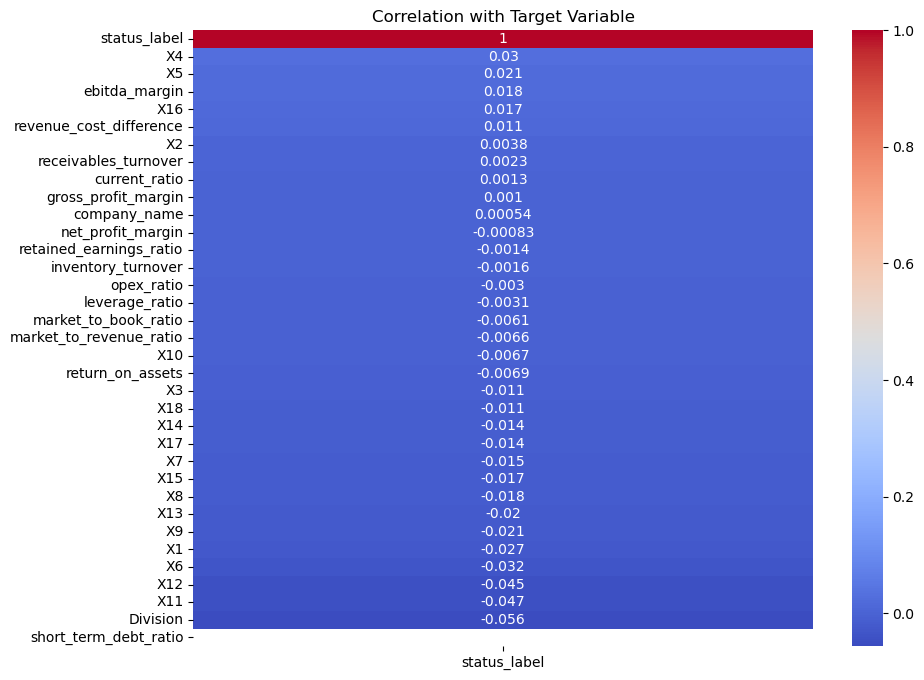

In [778]:
# Analyze Feature Correlations

# Compute the correlation matrix
correlation = df.corr()

# Plot a heatmap of correlations with the target variable 'status_label'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['status_label']].sort_values(by='status_label', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation with Target Variable")
plt.show()

# 2. Prepare Datasets

## 2.1 Split Datasets by Time

In [856]:
from sklearn.model_selection import train_test_split

train_data = []
test_data = []

# group by 'company_name', 
for company, group in df.groupby('company_name'):
    # train_data: first n-1 years
    train_data.append(group.iloc[:-1])
    # test_data: last year
    test_data.append(group.iloc[-1:])

train_data = pd.concat(train_data)
test_data = pd.concat(test_data)
X_train = train_data.drop('status_label', axis=1)
X_test = test_data.drop('status_label', axis=1)
y_train = train_data['status_label']
y_test = test_data['status_label']

# Size and ratio of training and testing datasets
print("Training set size:", X_train.shape)
print("\nTest set size:", X_test.shape)
print("\nTraining set:")
print(y_train.value_counts(normalize=True))
print("\nTesting set:")
print(y_test.value_counts(normalize=True))

Training set size: (69711, 34)

Test set size: (8971, 34)

Training set:
status_label
0    0.933855
1    0.066145
Name: proportion, dtype: float64

Testing set:
status_label
0    0.932115
1    0.067885
Name: proportion, dtype: float64


## 2.2 Handling Imbalance Datasets

Faced with imbalance datasets, we use SMOTE to oversampling. We will generate new minority class samples through interpolation.

In [790]:
from imblearn.over_sampling import SMOTE

# Oversampling by SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Training set size:", X_resampled.shape)
print("\nTesting set after oversampling:")
print(pd.Series(y_resampled).value_counts())

Training set size: (130200, 34)

Testing set after oversampling:
status_label
0    65100
1    65100
Name: count, dtype: int64


# 3. Train and Test Datasets 

## 3.1 Random Forest

In [793]:
from sklearn.model_selection import cross_val_score

# Model A: Use only the original features
X_o = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 
                 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
y_o = df['status_label']
model_a = RandomForestClassifier(random_state=42)
auc_a = cross_val_score(model_a, X_o, y_o, cv=5, scoring='roc_auc').mean()

# Print AUC comparison
print(f"AUC with Original Features: {auc_a:.4f}")

AUC with Original Features: 0.6623


In [795]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

# Model B: Use preprocessed resampled dataset
X_only_resampled = X_resampled[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 
                 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
clf_b = RandomForestClassifier(random_state=42)
clf_b.fit(X_only_resampled, y_resampled)

# Predict on testing set
y_pred = clf_b.predict(X_test[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 
                 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])

# Model evaluation
print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate AUC on the test set
y_pred_proba = clf_b.predict_proba(X_test[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 
                 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])[:, 1]  # Probabilities for the positive class
auc_b = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC on Test Set: {auc_b:.4f}")


Classification report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8362
           1       0.18      0.21      0.20       609

    accuracy                           0.88      8971
   macro avg       0.56      0.57      0.57      8971
weighted avg       0.89      0.88      0.89      8971


Confusion matrix:
[[7800  562]
 [ 482  127]]

AUC on Test Set: 0.7298


In [797]:
# Model C: Use resampled dataset with feature engineering
clf_c = RandomForestClassifier(random_state=42)
clf_c.fit(X_resampled, y_resampled)

# Predict on testing set
y_pred = clf_c.predict(X_test)

# Model evaluation
print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate AUC on the test set
y_pred_proba = clf_c.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
auc_c = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC on Test Set: {auc_c:.4f}")


Classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8362
           1       0.29      0.17      0.22       609

    accuracy                           0.91      8971
   macro avg       0.61      0.57      0.59      8971
weighted avg       0.90      0.91      0.90      8971


Confusion matrix:
[[8102  260]
 [ 504  105]]

AUC on Test Set: 0.7918


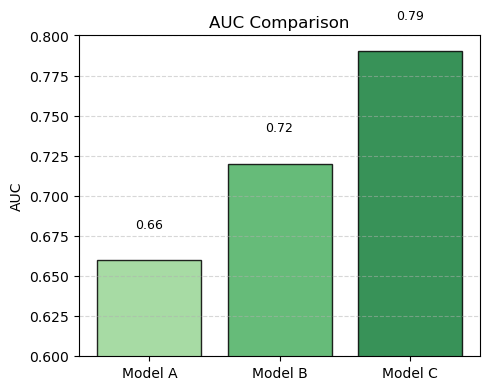

In [807]:
import matplotlib.pyplot as plt
import numpy as np

# AUC value
auc_values = [0.66, 0.72, 0.79]  
labels = ['Model A', 'Model B', 'Model C']

# Color mutation generation
colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(auc_values)))

# Create histogram
plt.figure(figsize=(5, 4))  
bars = plt.bar(labels, auc_values, color=colors, alpha=0.85, edgecolor='black')

# Title and label
plt.title('AUC Comparison', fontsize=12)
plt.ylabel('AUC', fontsize=10)
plt.ylim(0.6, 0.8)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add values for each bar
for bar, auc in zip(bars, auc_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{auc:.2f}', ha='center', fontsize=9)

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()  
plt.show()

## 3.2 ANN

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1743/1743 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.9325 - loss: 0.2723 - val_accuracy: 0.9339 - val_loss: 0.2326
Epoch 2/50
1743/1743 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - accuracy: 0.9332 - loss: 0.2371 - val_accuracy: 0.9347 - val_loss: 0.2287
Epoch 3/50
1743/1743 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step - accuracy: 0.9329 - loss: 0.2334 - val_accuracy: 0.9337 - val_loss: 0.2355
Epoch 4/50
1743/1743 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.9315 - loss: 0.2346 - val_accuracy: 0.9333 - val_loss: 0.2315
Epoch 5/50
1743/1743 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9335 - loss: 0.2266 - val_accuracy: 0.9340 - val_loss: 0.2362
Epoch 6/50
1743/1743 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9343 - loss: 0.2242 - val_accuracy: 0.9291 - val_loss: 0.2744
Epoch 7/50
1743/1743 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.9355 - loss: 0.2192 - val_accuracy: 0.9352 - val_loss: 0.2531
Epoch 8/50
1743/1743 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.9348 - loss: 0.22

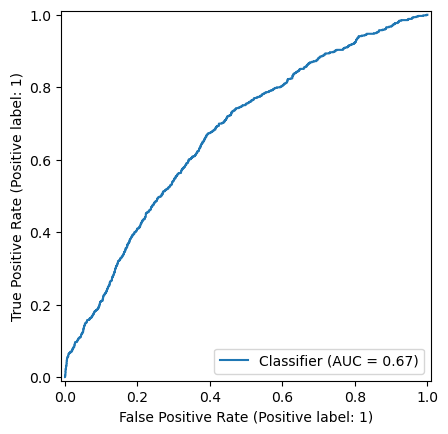

In [858]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to categorical (if not binary)
if len(np.unique(y_o)) > 2:  # Multi-class case
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

# Build ANN Model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(y_train.shape[1] if len(y_train.shape) > 1 else 1, activation='softmax' if len(y_train.shape) > 1 else 'sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy' if len(y_train.shape) > 1 else 'binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int) if y_pred_proba.shape[1] == 1 else np.argmax(y_pred_proba, axis=1)

# If y_test is categorical, convert it back to original labels
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Evaluate Model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC Calculation
if y_pred_proba.shape[1] == 1:  # Binary case
    auc = roc_auc_score(y_test, y_pred_proba)
else:  # Multi-class case (one-vs-rest)
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print(f"\nAUC: {auc:.4f}")

# ROC Curve (optional)
if y_pred_proba.shape[1] == 1:
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)
else:
    for i in range(y_pred_proba.shape[1]):
        RocCurveDisplay.from_predictions((y_test == i).astype(int), y_pred_proba[:, i])
